In [1]:
import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
x_train=images_train
y_train=cls_train
x_test=images_test
y_test=cls_test

In [7]:
#Shape of Training and Testing Data
print(f"Shape of x_train:{x_train.shape}, Shape of y_train:{y_train.shape}")
print(f"Shape of x_test:{x_test.shape}, Shape of y_test:{y_test.shape}")

Shape of x_train:(50000, 32, 32, 3), Shape of y_train:(50000,)
Shape of x_test:(10000, 32, 32, 3), Shape of y_test:(10000,)


In [8]:
def names(y):
    ls=[]
    for i in y:
        ls.append(class_names[i])
    return ls

In [9]:
#y_train=names(cls_train)
#y_test=(cls_test)

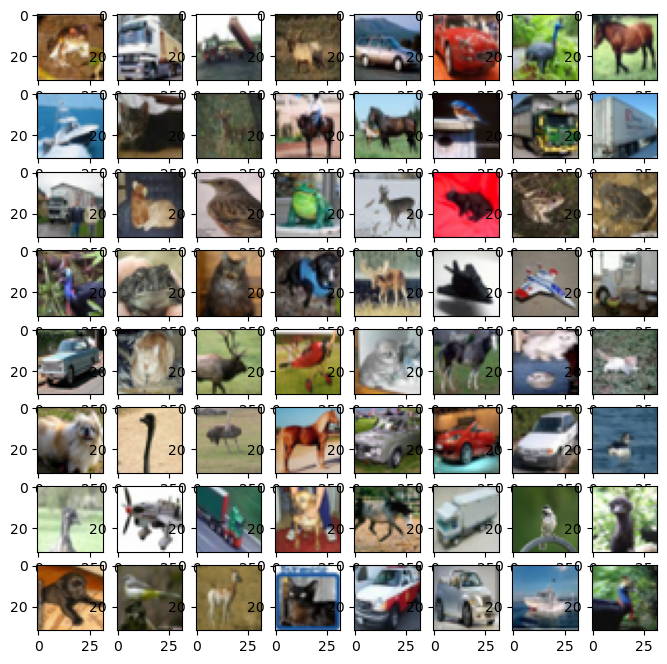

In [10]:
#plotting first 64 images from training data

fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_train[i],cmap=plt.cm.bone)
plt.show()

# Model Creation

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
782/782 [==============================] - 197s 248ms/step - loss: 2.0133 - accuracy: 0.2478 - val_loss: 1.7303 - val_accuracy: 0.3747
Epoch 2/100
782/782 [==============================] - 416s 532ms/step - loss: 1.6918 - accuracy: 0.3778 - val_loss: 1.5378 - val_accuracy: 0.4387
Epoch 3/100
782/782 [==============================] - 194s 248ms/step - loss: 1.5365 - accuracy: 0.4348 - val_loss: 1.4024 - val_accuracy: 0.4932
Epoch 4/100
782/782 [==============================] - 1179s 2s/step - loss: 1.4322 - accuracy: 0.4779 - val_loss: 1.3683 - val_accuracy: 0.5063
Epoch 5/100
782/782 [==============================] - 815s 1s/step - loss: 1.3515 - accuracy: 0.5097 - val_loss: 1.2268 - val_accuracy: 0.5532
Epoch 6/100
782/782 [==============================] - 199s 254ms/step - loss: 1.2902 - accuracy: 0.5354 - val_loss: 1.1893 - val_accuracy: 0.5704
Epoch 7/100
782/782 [==============================] - 208s 266ms/step - loss: 1.2250 - accuracy: 0.5621 - val_loss: 1.1383

782/782 [==============================] - 102s 130ms/step - loss: 0.4386 - accuracy: 0.8439 - val_loss: 0.5765 - val_accuracy: 0.8124
Epoch 57/100
782/782 [==============================] - 101s 129ms/step - loss: 0.4373 - accuracy: 0.8431 - val_loss: 0.5703 - val_accuracy: 0.8094
Epoch 58/100
782/782 [==============================] - 104s 133ms/step - loss: 0.4298 - accuracy: 0.8474 - val_loss: 0.5881 - val_accuracy: 0.8077
Epoch 59/100
782/782 [==============================] - 107s 137ms/step - loss: 0.4162 - accuracy: 0.8501 - val_loss: 0.5962 - val_accuracy: 0.8083
Epoch 60/100
782/782 [==============================] - 107s 137ms/step - loss: 0.4141 - accuracy: 0.8518 - val_loss: 0.5614 - val_accuracy: 0.8150
Epoch 61/100
782/782 [==============================] - 108s 138ms/step - loss: 0.4086 - accuracy: 0.8523 - val_loss: 0.5746 - val_accuracy: 0.8112
Epoch 62/100
782/782 [==============================] - 108s 138ms/step - loss: 0.4067 - accuracy: 0.8543 - val_loss: 0.5625 

In [14]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

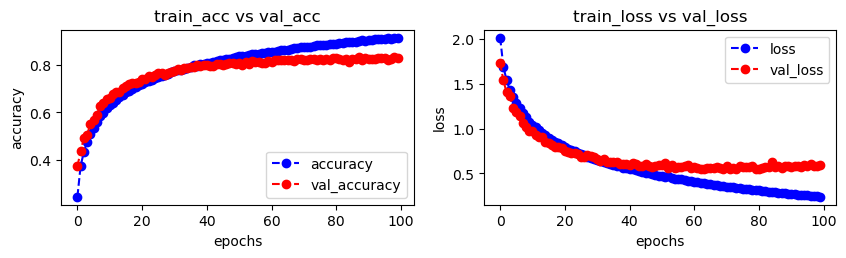

In [15]:
plot_accuracy_loss(history)

In [16]:
test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.5937 - accuracy: 0.8253


In [17]:
prediction = model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


In [19]:
pred_label = np.argmax(prediction, axis = 1) # We take the highest probability

In [23]:
y_pred=names(pred_label)
y_pred

['cat',
 'ship',
 'ship',
 'airplane',
 'frog',
 'frog',
 'cat',
 'frog',
 'cat',
 'automobile',
 'deer',
 'truck',
 'dog',
 'horse',
 'truck',
 'ship',
 'dog',
 'horse',
 'ship',
 'frog',
 'horse',
 'bird',
 'deer',
 'truck',
 'deer',
 'bird',
 'deer',
 'airplane',
 'truck',
 'frog',
 'frog',
 'dog',
 'deer',
 'dog',
 'truck',
 'cat',
 'deer',
 'automobile',
 'truck',
 'dog',
 'deer',
 'frog',
 'cat',
 'frog',
 'airplane',
 'truck',
 'cat',
 'truck',
 'horse',
 'bird',
 'truck',
 'ship',
 'airplane',
 'cat',
 'ship',
 'ship',
 'horse',
 'dog',
 'cat',
 'frog',
 'horse',
 'dog',
 'frog',
 'cat',
 'frog',
 'bird',
 'ship',
 'bird',
 'cat',
 'horse',
 'deer',
 'frog',
 'ship',
 'ship',
 'airplane',
 'bird',
 'airplane',
 'cat',
 'dog',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'horse',
 'bird',
 'horse',
 'bird',
 'horse',
 'ship',
 'truck',
 'airplane',
 'frog',
 'ship',
 'frog',
 'deer',
 'frog',
 'frog',
 'airplane',
 'airplane',
 'horse',
 'deer',
 'dog',
 'frog',
 'cat',
 'au

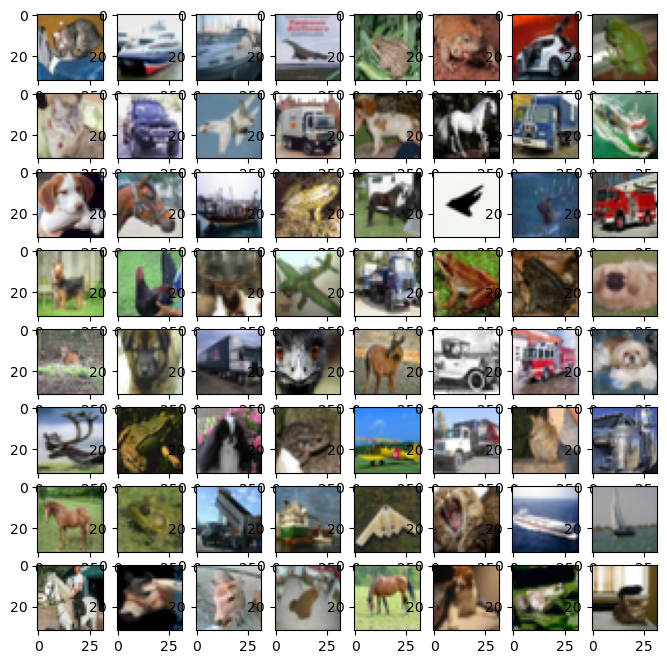

In [22]:
#plotting testing data
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_test[i],cmap=plt.cm.bone)
plt.show()

In [24]:
ser=pd.Series(names(y_pred))
ser.to_csv('Cifar10.csv',index=False,header=None)

In [25]:
model.save('cifar10_sev.h5')